In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import scipy.io.wavfile as siowav
import IPython
from scipy.signal import find_peaks
import sounddevice as sd
import wavio as wv

In [2]:
rollno = 224
alpha = 1 + np.mod(rollno,3)
A = 160
B = 166

# Defining the Discrete Fourier Transform

In [4]:
def dft(signal, Fs):
    N=len(signal)
    dft = abs(np.fft.fft(signal, n=N))/N
    dB = 20*np.log10(dft)
    Hz = (np.arange(0,len(signal))/len(signal))*Fs
    return Hz, dft

# Problem 1

Text(0, 0.5, 'x(t)')

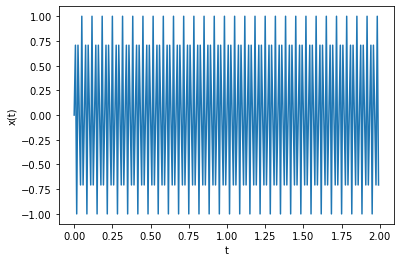

In [5]:
Fs = 120
t = np.arange(0, 2, 1/Fs)
x = np.sin(2*np.pi*(15*alpha)*t)
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t)')

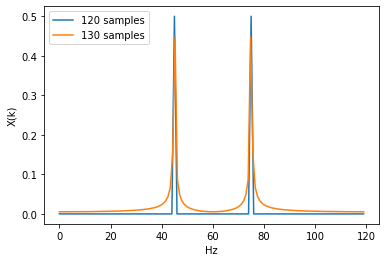

In [6]:
samples_120 = x[:120]
samples_130 = x[:130]

plt.figure()

Hz_120, dft_120 = dft(samples_120, Fs)
Hz_130, dft_130 = dft(samples_130, Fs)
plt.plot(Hz_120,dft_120)
plt.plot(Hz_130, dft_130)
plt.xlabel('Hz')
plt.ylabel('X(k)')
plt.legend(['120 samples','130 samples'], loc='upper left')

Text(0.5, 1.0, 'DFT of first 96 samples')

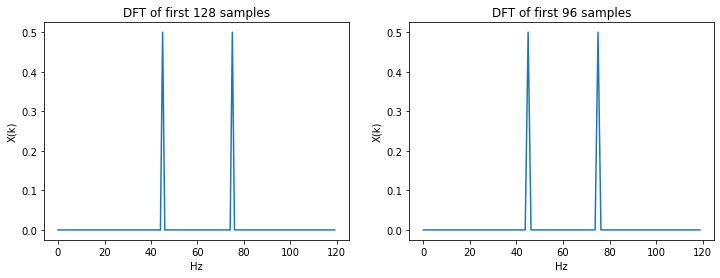

In [7]:
samples_128 = x[:128]
Hz_128, dft_128 = dft(samples_128, Fs)
samples_96 = x[:96]
Hz_96, dft_96 = dft(samples_96, Fs)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(Hz_128,dft_128)
plt.xlabel('Hz')
plt.ylabel('X(k)')
plt.title('DFT of first 128 samples')

plt.subplot(122)
plt.plot(Hz_96,dft_96)
plt.xlabel('Hz')
plt.ylabel('X(k)')
plt.title('DFT of first 96 samples')

# Problem 2

In [9]:
Fs = 200
t = np.arange(0, 10, 1/Fs)
xa = 0.1*np.sin(A*np.pi*t) + np.cos(B*np.pi*t)

samples_215 = xa[:215]
samples_415 = xa[:415]
samples_1115 = xa[:1115]
samples_1515 = xa[:1515]
samples_1915 = xa[:1915]

Hz_215, dft_215 = dft(samples_215, Fs)
Hz_415, dft_415 = dft(samples_415, Fs)
Hz_1115, dft_1115 = dft(samples_1115, Fs)
Hz_1515, dft_1515 = dft(samples_1515, Fs)
Hz_1915, dft_1915 = dft(samples_1915, Fs)


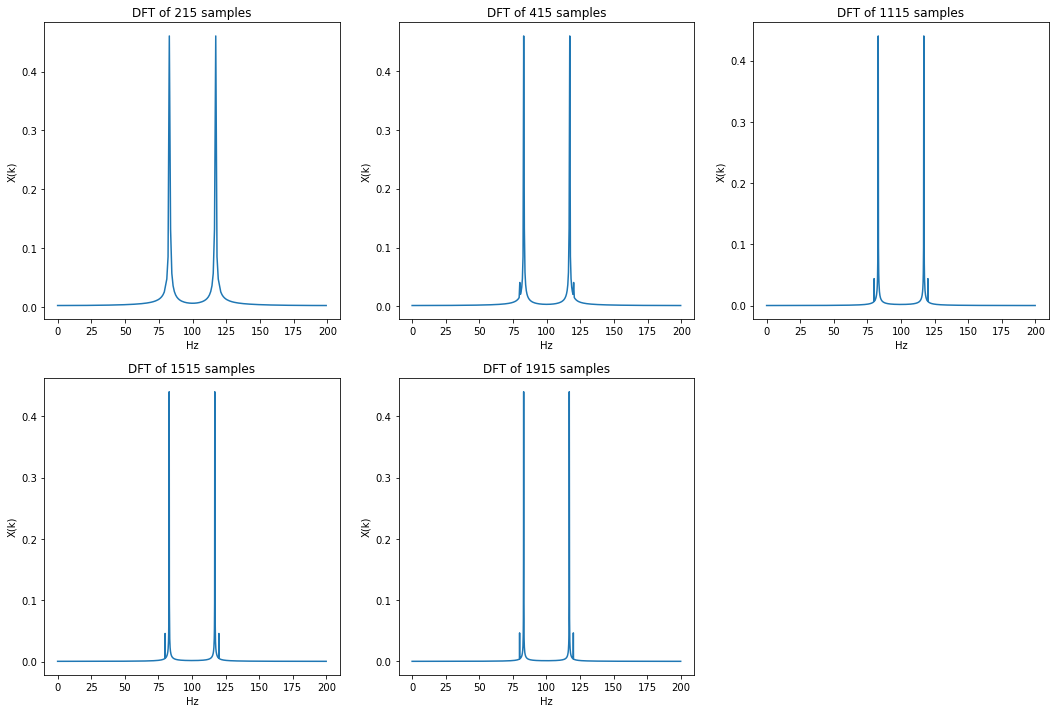

In [10]:
plt.figure(figsize=(18,12))

plt.subplot(231)
plt.plot(Hz_215, dft_215)
plt.xlabel('Hz')
plt.ylabel('X(k)')
plt.title('DFT of 215 samples')

plt.subplot(232)
plt.plot(Hz_415, dft_415)
plt.xlabel('Hz')
plt.ylabel('X(k)')
plt.title('DFT of 415 samples')

plt.subplot(233)
plt.plot(Hz_1115, dft_1115)
plt.xlabel('Hz')
plt.ylabel('X(k)')
plt.title('DFT of 1115 samples')

plt.subplot(234)
plt.plot(Hz_1515, dft_1515)
plt.xlabel('Hz')
plt.ylabel('X(k)')
plt.title('DFT of 1515 samples')

plt.subplot(235)
plt.plot(Hz_1915, dft_1915)
plt.xlabel('Hz')
plt.ylabel('X(k)')
plt.title('DFT of 1915 samples')

plt.savefig('problem2.png')

# Problem 3

<ipython-input-11-97121a4c961c>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.blackman(215))


Text(0.5, 1.0, 'Blackman window')

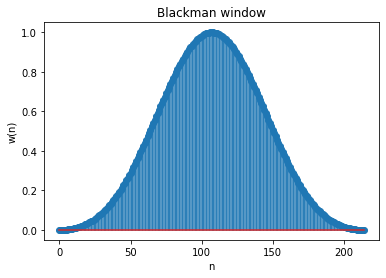

In [11]:
plt.stem(np.blackman(215))
plt.xlabel('n')
plt.ylabel('w(n)')
plt.title('Blackman window')

In [12]:
blackman_215 = samples_215 * np.blackman(215)
blackman_415 = samples_415 * np.blackman(415)
blackman_1115 = samples_1115 * np.blackman(1115)
blackman_1515 = samples_1515 * np.blackman(1515)
blackman_1915 = samples_1915 * np.blackman(1915)
samples_415 = xa[:415]
samples_1115 = xa[:1115]
samples_1515 = xa[:1515]
samples_1915 = xa[:1915]

Hz_215, dft_blackman_215 = dft(blackman_215, Fs)
Hz_415, dft_blackman_415 = dft(blackman_415, Fs)
Hz_1115, dft_blackman_1115 = dft(blackman_1115, Fs)
Hz_1515, dft_blackman_1515 = dft(blackman_1515, Fs)
Hz_1915, dft_blackman_1915 = dft(blackman_1915, Fs)  

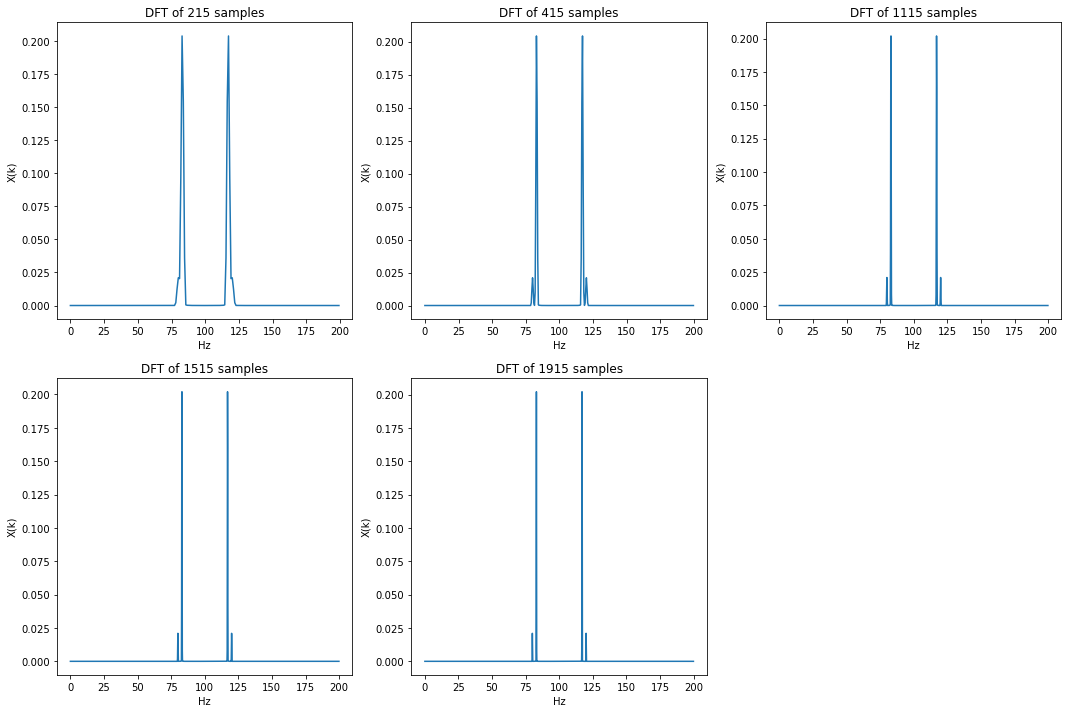

In [13]:
plt.figure(figsize=(18,12))

plt.subplot(231)
plt.plot(Hz_215, dft_blackman_215)
plt.xlabel('Hz')
plt.ylabel('X(k)')
plt.title('DFT of 215 samples')

plt.subplot(232)
plt.plot(Hz_415, dft_blackman_415)
plt.xlabel('Hz')
plt.ylabel('X(k)')
plt.title('DFT of 415 samples')

plt.subplot(233)
plt.plot(Hz_1115, dft_blackman_1115)
plt.xlabel('Hz')
plt.ylabel('X(k)')
plt.title('DFT of 1115 samples')

plt.subplot(234)
plt.plot(Hz_1515, dft_blackman_1515)
plt.xlabel('Hz')
plt.ylabel('X(k)')
plt.title('DFT of 1515 samples')

plt.subplot(235)
plt.plot(Hz_1915, dft_blackman_1915)
plt.xlabel('Hz')
plt.ylabel('X(k)')
plt.title('DFT of 1915 samples')

plt.savefig('problem3.png')

# Problem 4

[0.308, 0.316, -0.316, -0.308]


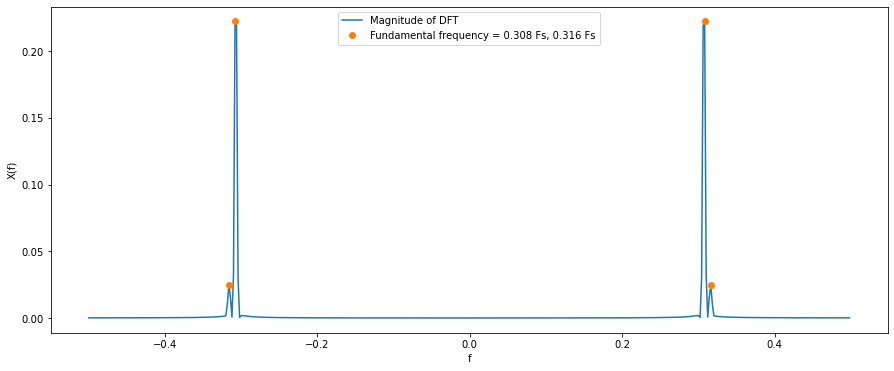

In [14]:
# Spectrum after windowing with hamming window
from scipy.signal import find_peaks
plt.figure(figsize=(15,6))
data = np.loadtxt('Exp4Data3.txt', delimiter=',')
data*=np.hamming(len(data))
f = np.arange(-0.5,0.5,1/500)
spectrum = abs(np.fft.fft(data, n=500))/len(data)
freqs = find_peaks(spectrum, threshold=0.001)[0]

#Converting to Fs
fundamental = []
for i in range(0, len(freqs)):
    if freqs[i]/(len(data))<0.5:
        fundamental.append(round(freqs[i]/len(data),3))
    else:
        fundamental.append(round(freqs[i]/len(data) - 1,3))

plt.plot(f,np.fft.fftshift(spectrum))
print(fundamental)
plt.plot(fundamental,spectrum[freqs],'o')
plt.xlabel('f')
plt.ylabel('X(f)')
plt.legend(['Magnitude of DFT','Fundamental frequency = '+str(fundamental[0])+' Fs'+', '+str(fundamental[1])+' Fs'], loc='upper center')

[0.308, 0.318, -0.318, -0.308]


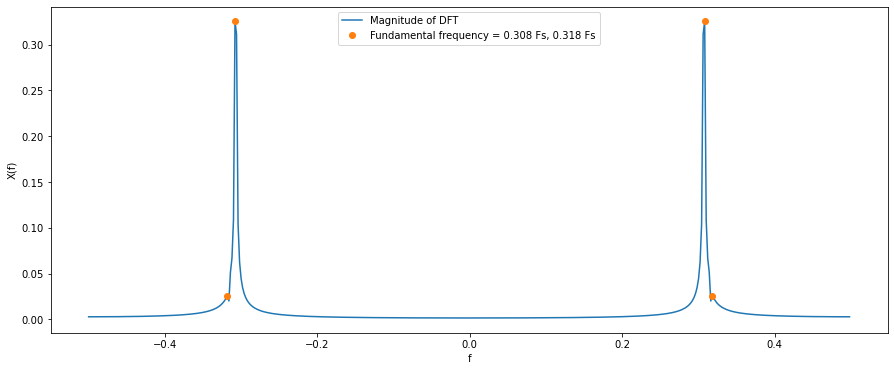

In [15]:
# Spectrum after windowing with rectangular window
from scipy.signal import find_peaks
plt.figure(figsize=(15,6))
data = np.loadtxt('Exp4Data3.txt', delimiter=',')
f = np.arange(-0.5,0.5,1/500)
spectrum = abs(np.fft.fft(data))/len(data)
freqs = find_peaks(spectrum, threshold=0.001)[0]

#Converting to Fs
fundamental = []
for i in range(0, len(freqs)):
    if freqs[i]/(len(data))<0.5:
        fundamental.append(round(freqs[i]/len(data),3))
    else:
        fundamental.append(round(freqs[i]/len(data) - 1,3))

plt.plot(f,np.fft.fftshift(spectrum))
print(fundamental)
plt.plot(fundamental,spectrum[freqs],'o')
plt.xlabel('f')
plt.ylabel('X(f)')
plt.legend(['Magnitude of DFT','Fundamental frequency = '+str(fundamental[0])+' Fs'+', '+str(fundamental[1])+' Fs'], loc='upper center')